In [1]:
#######################
#Michael Siebel
#Individual Project 2
#DATS 6103 (Sec 10)
######################

#Inital data cleaning section
#Import Packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from inspect import signature
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('', '') #add id and API key

#Set Display (Remove Scientific Notation)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Read in Data
Gini = pd.read_csv('World_Bank_Gini.csv', sep=',').drop(['Series Code'], axis=1) 
Export = pd.read_csv('World_Bank_Export.csv', sep=',').drop(['Series Code'], axis=1) 
Import = pd.read_csv('World_Bank_Import.csv', sep=',').drop(['Series Code'], axis=1) 
ICT_Share = pd.read_csv('TED_Share_of_ICT_Capital.csv', sep=',', skiprows=4).drop(['NR', 'MEASURE'], axis=1) 
ICT_Share.rename(columns={'INDICATOR':'Series Name', 'REGION':'Region', 'COUNTRY':'Country Name', 'ISO':'Country Code'}, inplace=True)
Capital = pd.read_csv('TED_Share_of_Capital.csv', sep=',', skiprows=4).drop(['NR', 'MEASURE'], axis=1) 
Capital.rename(columns={'INDICATOR':'Series Name', 'REGION':'Region', 'COUNTRY':'Country Name', 'ISO':'Country Code'}, inplace=True)
GDP = pd.read_csv('World_Bank_GDP.csv', sep=',').drop(['Series Code'], axis=1) 
PopDensity = pd.read_csv('World_Bank_Population_Density.csv', sep=',').drop(['Series Code'], axis=1) 
GDPperCapita = pd.read_csv('World_Bank_GDP_per_Capita.csv', sep=',').drop(['Series Code'], axis=1)

In [2]:
#Convert into Longitudinal dataset
df = Gini
df = df.append(Export)
df = df.append(Import)
df = df.append(ICT_Share)
df = df.append(Capital)
df = df.append(GDP)
df = df.append(PopDensity)
df = df.append(GDPperCapita)
df = df.drop(['Region'], axis=1)
df = df.set_index(['Series Name'])
df = df.drop(['2017'], axis=1)
df.loc['Capital Share'].head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,Country Code,Country Name
Series Name,,,,,,,,,,,,,,,,,,,,,
Capital Share,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,...,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,DZA,Algeria
Capital Share,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,...,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,AGO,Angola
Capital Share,35.30,35.70,35.00,34.70,32.50,34.20,35.60,35.40,36.60,37.10,...,47.20,47.60,50.30,50.30,50.30,50.30,50.30,50.30,BFA,Burkina Faso
Capital Share,45.80,45.80,45.80,45.80,45.80,45.80,45.80,45.80,45.80,45.80,...,53.40,53.40,53.40,53.40,53.40,53.40,53.40,53.40,CMR,Cameroon
Capital Share,26.70,26.70,26.70,26.70,26.70,26.70,26.70,26.70,26.70,26.70,...,31.30,31.30,31.30,31.30,31.30,31.30,31.30,31.30,CIV,Côte d'Ivoire


In [3]:
#Check Variables
df.index.unique()

Index(['GINI index (World Bank estimate)',
       'Exports of goods and services (current US$)',
       'Imports of goods and services (current US$)', 'ICT Capital Share',
       'Capital Share', 'GDP (current US$)',
       'Population density (people per sq. km of land area)',
       'GDP per capita (current US$)'],
      dtype='object', name='Series Name')

In [4]:
#Pivot three variables
df = pd.pivot_table(df,index=['Series Name','Country Code', 'Country Name'])
df.columns = np.arange(1980,2017)
df.head()

1980  1981  1982  1983  1984  \
Series Name   Country Code Country Name                                         
Capital Share AGO          Angola               50.00 50.00 50.00 50.00 50.00   
              ALB          Albania              50.00 50.00 50.00 50.00 50.00   
              ARE          United Arab Emirates 87.20 85.00 82.40 80.10 79.30   
              ARG          Argentina            57.70 57.70 57.70 57.70 57.70   
              ARM          Armenia              23.80 23.80 23.80 23.80 23.80   

                                                 1985  1986  1987  1988  1989  \
Series Name   Country Code Country Name                                         
Capital Share AGO          Angola               50.00 50.00 50.00 50.00 50.00   
              ALB          Albania              50.00 50.00 50.00 50.00 50.00   
              ARE          United Arab Emirates 78.30 75.00 76.40 75.50 77.30   
              ARG          Argentina            57.70 57.70 57.70 57.70 57.70   
              ARM          Armenia              23.80 23.80 23.80 23.80 23.80   

                                                 ...   2007  2008  2009  2010  \
Series Name   Country Code Country Name          ...                            
Capital Share AGO          Angola                ...  50.00 50.00 50.00 50.00   
              ALB          Albania               ...  50.00 50.00 50.00 50.00   
              ARE          United Arab Emirates  ...  78.60 78.40 74.30 74.00   
              ARG          Argentina             ...  64.70 62.10 58.40 59.10   
              ARM          Armenia               ...  43.90 46.70 45.00 46.20   

                                                 2011  2012  2013  2014  2015  \
Series Name   Country Code Country Name                                         
Capital Share AGO          Angola               50.00 50.00 50.00 50.00 50.00   
              ALB          Albania              50.00 50.00 50.00 50.00 50.00   
              ARE          United Arab Emirates 75.50 75.00 74.00 72.40 72.40   
              ARG          Argentina            56.60 52.90 51.10 51.10 51.10   
              ARM          Armenia              43.60 43.30 46.40 47.00 47.70   

                                                 2016  
Series Name   Country Code Country Name                
Capital Share AGO          Angola               50.00  
              ALB          Albania              50.00  
              ARE          United Arab Emirates 72.40  
              ARG          Argentina            51.10  
              ARM          Armenia              47.70  

[5 rows x 37 columns]

In [5]:
#FDI dataset does not need to be reshaped
FDI_rshp = pd.read_csv('External_Wealth_of_Nations_Database_2015.csv', sep=',') 
FDI_rshp = FDI_rshp[['Country Code','Year','FDI assets (stock)','FDI liabilities (stock)','GDP (US$)']]
FDI_rshp.rename(columns={'GDP (US$)':'GDP (EWN)','Year':'Years'}, inplace=True)
FDI_rshp.head()

,Country Code,Years,FDI assets (stock),FDI liabilities (stock),GDP (EWN)
0,AFG,1970,nan,nan,nan
1,AFG,1971,nan,nan,nan
2,AFG,1972,nan,nan,nan
3,AFG,1973,nan,nan,nan
4,AFG,1974,nan,nan,nan


In [6]:
#Reshape to Cross-Sectional Panel Data
    #Gini
Gini_reset = df.loc['GINI index (World Bank estimate)'].T.reset_index()
Gini_reset.rename(columns={'index':'Years'}, inplace=True)
Gini_rshp = pd.melt(Gini_reset, id_vars=['Years'],var_name=['Country Code', 'Country Name'])
Gini_rshp.rename(columns={'value':'Gini'}, inplace=True)
    #Export
Export_reset = df.loc['Exports of goods and services (current US$)'].T.reset_index()
Export_reset.rename(columns={'index':'Years'}, inplace=True)
Export_rshp = pd.melt(Export_reset, id_vars=['Years'],var_name=['Country Code', 'Country Name'])
Export_rshp.rename(columns={'value':'Export'}, inplace=True)
    #Import
Import_reset = df.loc['Imports of goods and services (current US$)'].T.reset_index()
Import_reset.rename(columns={'index':'Years'}, inplace=True)
Import_rshp = pd.melt(Import_reset, id_vars=['Years'],var_name=['Country Code', 'Country Name'])
Import_rshp.rename(columns={'value':'Import'}, inplace=True)
    #ICT
ICT_reset = df.loc['ICT Capital Share'].T.reset_index()
ICT_reset.rename(columns={'index':'Years'}, inplace=True)
ICT_rshp = pd.melt(ICT_reset, id_vars=['Years'],var_name=['Country Code', 'Country Name'])
ICT_rshp.rename(columns={'value':'ICT'}, inplace=True)
    #Capital
Capital_reset = df.loc['Capital Share'].T.reset_index()
Capital_reset.rename(columns={'index':'Years'}, inplace=True)
Capital_rshp = pd.melt(Capital_reset, id_vars=['Years'],var_name=['Country Code', 'Country Name'])
Capital_rshp.rename(columns={'value':'Capital'}, inplace=True)
    #GDP
GDP_reset = df.loc['GDP (current US$)'].T.reset_index()
GDP_reset.rename(columns={'index':'Years'}, inplace=True)
GDP_rshp = pd.melt(GDP_reset, id_vars=['Years'],var_name=['Country Code', 'Country Name'])
GDP_rshp.rename(columns={'value':'GDP (WDI)'}, inplace=True)
    #Pop Density
PopDensity_reset = df.loc['Population density (people per sq. km of land area)'].T.reset_index()
PopDensity_reset.rename(columns={'index':'Years'}, inplace=True)
PopDensity_rshp = pd.melt(PopDensity_reset, id_vars=['Years'],var_name=['Country Code', 'Country Name'])
PopDensity_rshp.rename(columns={'value':'Population Density'}, inplace=True)
    #GDP per Capita
Wealth_reset = df.loc['GDP per capita (current US$)'].T.reset_index()
Wealth_reset.rename(columns={'index':'Years'}, inplace=True)
Wealth_rshp = pd.melt(Wealth_reset, id_vars=['Years'],var_name=['Country Code', 'Country Name'])
Wealth_rshp.rename(columns={'value':'Wealth'}, inplace=True)

In [7]:
#Merge Reshaped Data
df_rshp = Gini_rshp
df_rshp = df_rshp.merge(FDI_rshp)
df_rshp = df_rshp.merge(Export_rshp)
df_rshp = df_rshp.merge(Import_rshp)
df_rshp = df_rshp.merge(ICT_rshp)
df_rshp = df_rshp.merge(Capital_rshp)
df_rshp = df_rshp.merge(GDP_rshp)
df_rshp = df_rshp.merge(PopDensity_rshp)
df_rshp = df_rshp.merge(Wealth_rshp)
df_rshp = df_rshp.set_index(['Country Name','Years']).sort_index()
df_rshp.head()

#Recode/Impute
df_rshp['Gini'] = df_rshp['Gini'].interpolate(limit=3, limit_direction='both')

df_rshp['Export'] = df_rshp['Export'].fillna(method='ffill', limit=3)
df_rshp['Import'] = df_rshp['Import'].fillna(method='ffill', limit=3)
df_rshp['GDP (WDI)'] = df_rshp['GDP (WDI)'].fillna(method='ffill', limit=3)
df_rshp['Trade'] = ((df_rshp['Export']+df_rshp['Import'])/df_rshp['GDP (WDI)'])

df_rshp['FDI assets (stock)'] = df_rshp['FDI assets (stock)'].fillna(method='ffill', limit=3)
df_rshp['FDI liabilities (stock)'] = df_rshp['FDI liabilities (stock)'].fillna(method='ffill', limit=3)
df_rshp['GDP (EWN)'] = df_rshp['GDP (EWN)'].fillna(method='ffill', limit=3)
df_rshp['FDI'] = ((df_rshp['FDI assets (stock)']+df_rshp['FDI liabilities (stock)'])/df_rshp['GDP (EWN)'])

df_rshp['ICT'] = df_rshp['ICT'].fillna(method='ffill', limit=3)
df_rshp['Capital'] = df_rshp['Capital'].fillna(method='ffill', limit=3)
df_rshp['Technology'] = ((df_rshp['ICT'])/df_rshp['Capital'])*100

df_rshp = df_rshp[['Gini', 'Trade', 'FDI', 'Technology', 'Population Density', 'Capital', 'Wealth']]
df_rshp.head()

Gini  Trade  FDI  Technology  Population Density  Capital  \
Country Name Years                                                              
Albania      1980    nan    nan  nan         nan               97.52    50.00   
             1981    nan    nan  nan         nan               99.49    50.00   
             1982    nan    nan  nan         nan              101.62    50.00   
             1983    nan    nan  nan         nan              103.79    50.00   
             1984    nan   0.37  nan         nan              106.00    50.00   

                    Wealth  
Country Name Years          
Albania      1980      nan  
             1981      nan  
             1982      nan  
             1983      nan  
             1984   662.52

In [8]:
#Check if all variables are float64
df_rshp.dtypes

Gini                  float64
Trade                 float64
FDI                   float64
Technology            float64
Population Density    float64
Capital               float64
Wealth                float64
dtype: object

In [9]:
#Missing data in 2015
df_rshp = df_rshp.reset_index()
df_rshp_2015 = df_rshp['Years'] == 2015
df_rshp_2015 = df_rshp[df_rshp_2015]
df_rshp = df_rshp.set_index(['Country Name','Years'])
df_rshp_2015 = df_rshp_2015.set_index(['Country Name','Years'])

#Check to see if there are any missing on 2015
print("The amount of missing data for year 2015 is:\n", df_rshp_2015.isnull().sum(axis=0))

The amount of missing data for year 2015 is:
 Gini                  31
Trade                  1
FDI                    0
Technology            17
Population Density     0
Capital                0
Wealth                 0
dtype: int64


In [10]:
#First look at the top ten
#The top ten most equal countries according to their Gini coefficient
equal_2015 = df_rshp_2015.sort_values(by='Gini', ascending=True, na_position='last').head(10)
equal_2015 = equal_2015.reset_index().drop(['Years','FDI', 'Trade', 'Technology', \
                                            'Population Density','Capital', 'Wealth'],axis=1)
equal_2015

,Country Name,Gini
0,Slovenia,25.40
1,Ukraine,25.50
2,Iceland,25.89
3,Czech Republic,25.90
4,Slovak Republic,26.50
5,Belarus,26.70
6,Kazakhstan,26.90
7,Moldova,27.00
8,Finland,27.10
9,Norway,27.50


In [11]:
#First look at the bottom ten
#The top ten most inequal countries according to their Gini coefficient
inequal_2015 = df_rshp_2015.sort_values(by='Gini', ascending=False).head(10)
inequal_2015 = inequal_2015.reset_index().drop(['Years','FDI', 'Trade', 'Technology', \
                                                'Population Density','Capital', 'Wealth'],axis=1)
inequal_2015

,Country Name,Gini
0,South Africa,61.75
1,Zambia,57.10
2,Mozambique,53.57
3,Brazil,51.30
4,Colombia,51.10
5,Costa Rica,48.40
6,Chile,47.70
7,Bolivia,46.70
8,Ecuador,46.00
9,Madagascar,45.91


In [12]:
#Save Most Equal and Inequal countries for 2015
equal_2015_names = equal_2015['Country Name'].values
inequal_2015_names = inequal_2015['Country Name'].values

In [13]:
#Graph Most Equal and Most Inequal Countries (Map)
#Using Plotly
trace1 = {
  "z": ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], 
  "autocolorscale": False, 
  "colorbar": {
    "x": 1.14066830434, 
    "y": 0.5, 
    "showticklabels": False, 
    "thickness": 30.0, 
    "thicknessmode": "pixels", 
    "title": "Highest Equality", 
    "xanchor": "center", 
    "yanchor": "middle"
  }, 
  "colorscale": [
    [0, "rgb(5,10,172)"], [0.35, "rgb(40,60,190)"], [0.5, "rgb(70,100,245)"], [0.6, "rgb(90,120,245)"], [0.7, "rgb(106,137,247)"], [1, "rgb(220,220,220)"]], 
  "locationmode": "country names", 
  "locations": equal_2015_names, 
  "locationssrc": "siebelm:4:466dd6", 
  "name": "Column 2", 
  "reversescale": False, 
  "showscale": True, 
  "type": "choropleth", 
  "uid": "fd9d7d", 
  "zauto": True, 
  "zmax": 10, 
  "zmin": 1, 
  "zsrc": "siebelm:4:8035e3"
}
trace2 = {
  "z": ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], 
  "autocolorscale": False, 
  "colorbar": {
    "x": 1.33536795398, 
    "y": 0.5, 
    "showticklabels": False, 
    "thickness": 30.0, 
    "thicknessmode": "pixels", 
    "title": "Lowest Equality", 
    "xanchor": "center", 
    "yanchor": "middle"
  }, 
  "colorscale": [
    [0, "rgb(222, 183, 175)"], [0.35, "rgb(207, 131, 113)"], [0.5, "rgb(192, 88, 64)"], [0.6, "rgb(182, 59, 37)"], [0.7, "rgb(150, 19, 27)"], [1, "rgb(144, 19, 28)"]], 
  "locationmode": "country names", 
  "locations": inequal_2015_names, 
  "locationssrc": "siebelm:4:5570ef", 
  "name": "Column 2", 
  "reversescale": True, 
  "showscale": True, 
  "type": "choropleth", 
  "uid": "7a0886", 
  "zauto": True, 
  "zmax": 10, 
  "zmin": 1, 
  "zsrc": "siebelm:4:8035e3"
}
data = Data([trace1, trace2])
layout = {
  "autosize": True, 
  "dragmode": "select", 
  "geo": {
    "center": {"lon": 11.0958287671}, 
    "projection": {"rotation": {"lon": 11.0958287671}}
  }, 
  "hovermode": "closest", 
  "showlegend": True, 
  "title": "<b>Top and Bottom 10 Countries \n According to Gini Index</b>"
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

C:\Users\Siebelm\Anaconda3\lib\site-packages\plotly\tools.py:1410: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!



In [14]:
#Table of Most Equal/Inequal Countries
#Create function 1: Table sorting the top countries
#View countries sorted by their gini coefficient or other variables such as Trade, FDI, or Technology
#Can show country names sorted by any gini coefficient or the other categories
#Can show only the amounts sorted by gini coefficient
#Can change the table row length from 10 to any other number

def equalGini(year,inequal=False, trade=False, fdi=False, technology=False, \
              popdens=False, capital=False, wealth=False, amount=False):
        
    #Set data to year of input    
    df_rshp_t = df_rshp.reset_index()
    top10 = df_rshp_t['Years'] == year
    df_rshp_t = df_rshp_t[top10]

    #Drop unneeded variables
    df_rshp_t = df_rshp_t.drop(['Years'],axis=1)
    
    #Default is to sort by 2015 most equal countries
    df_rshp_t = df_rshp_t.set_index(['Country Name'])
    if inequal == False:
        df_rshp_t = df_rshp_t.loc[equal_2015_names]
    else:
        df_rshp_t = df_rshp_t.loc[inequal_2015_names]

    #Drop variables if not specified
    if trade == False:
        df_rshp_t = df_rshp_t.drop(['Trade'],axis=1)
    if fdi == False:
        df_rshp_t = df_rshp_t.drop(['FDI'],axis=1)
    if technology == False:
        df_rshp_t = df_rshp_t.drop(['Technology'],axis=1)
    if popdens == False:
        df_rshp_t = df_rshp_t.drop(['Population Density'],axis=1)
    if capital == False:
        df_rshp_t = df_rshp_t.drop(['Capital'],axis=1)
    if wealth == False:
        df_rshp_t = df_rshp_t.drop(['Wealth'],axis=1)
        
    #If six alternative variables were not specified use default gini coefficient
    if trade==True or fdi==True or technology==True or popdens==True or capital==True or wealth==True:
        df_rshp_t = df_rshp_t.drop(['Gini'],axis=1)  	
    
    #If 'amount' is specified, remove country names and keep values sorted by gini coefficient
    if amount==True:
        df_rshp_t = df_rshp_t.reset_index(drop=True) 
        df_rshp_t.columns = [year]

    return df_rshp_t

In [15]:
#Indicators for Top 10 Most Equal
equalGini(2015, trade=True, fdi=True, technology=True, popdens=True, capital=True, wealth=True)

,Trade,FDI,Technology,Population Density,Capital,Wealth
Country Name,,,,,,
Slovenia,1.45,0.52,5.22,102.46,40.20,20873.16
Ukraine,1.07,0.80,1.12,77.95,53.70,2124.66
Iceland,0.99,1.96,nan,3.30,45.50,51213.66
Czech Republic,1.56,1.00,9.18,136.57,49.00,17715.62
Slovak Republic,1.84,0.72,5.61,112.80,41.00,16132.86
Belarus,1.16,0.34,nan,46.77,42.70,5949.11
Kazakhstan,0.53,0.90,nan,6.50,53.90,10509.98
Moldova,1.17,0.58,nan,123.81,46.60,1832.50
Finland,0.73,1.20,5.19,18.03,46.20,42424.22


In [16]:
#Indicators for Top 10 Least Equal
equalGini(2015, inequal=True, trade=True, fdi=True, technology=True, popdens=True, capital=True, wealth=True)

,Trade,FDI,Technology,Population Density,Capital,Wealth
Country Name,,,,,,
South Africa,0.62,0.90,4.66,45.58,45.10,5744.32
Zambia,0.80,0.50,3.20,21.66,50.00,1313.89
Mozambique,1.04,1.96,nan,35.62,27.70,528.31
Brazil,0.27,0.51,3.12,24.64,48.00,8757.21
Colombia,0.39,0.67,1.56,43.47,45.00,6044.53
Costa Rica,0.62,0.74,5.17,94.16,44.50,11406.36
Chile,0.59,1.41,4.90,23.89,53.10,13653.23
Bolivia,0.68,0.35,3.98,9.90,65.40,3077.03
Ecuador,0.45,0.17,2.81,65.00,56.90,6150.16


In [17]:
#Average Statistics for Most Equal and Least Equal Countries
statAverage = pd.DataFrame(columns=['Indicator','Most Equal','Least Equal','Correlation with Gini'])
correlation = np.array(df_rshp_2015.corr().iloc[0])
counter = 0
for i in df_rshp_2015.columns:
    statAverage = statAverage.append({'Indicator': i, \
    'Most Equal': df_rshp_2015[i].loc[equal_2015_names].mean(), \
    'Least Equal': df_rshp_2015[i].loc[inequal_2015_names].mean(), \
    'Correlation with Gini': correlation[counter]}, ignore_index=True)
    counter += 1
statAverage = statAverage.set_index(['Indicator'])
statAverage

,Most Equal,Least Equal,Correlation with Gini
Indicator,,,
Gini,26.44,50.95,1.00
Trade,1.12,0.61,-0.33
FDI,0.91,0.79,-0.00
Technology,5.12,3.67,-0.27
Population Density,64.24,40.56,-0.15
Capital,47.09,48.57,0.10
Wealth,24327.39,5707.71,-0.33


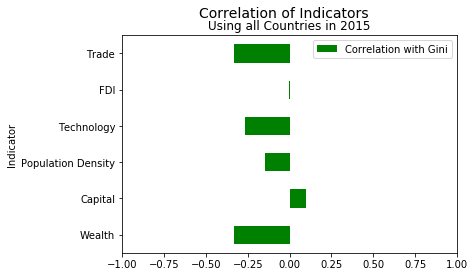

In [18]:
#Compare the correlation of indicators with Gini Coefficient
#Horizontal Bar Chart
plt.figure(figsize=(12,12))
statAverage[['Correlation with Gini']].iloc[1:len(statAverage)] \
    .plot.barh(stacked=True, color='green').invert_yaxis()
plt.suptitle('Correlation of Indicators', fontsize=14)
plt.title('Using all Countries in 2015')
plt.ylabel('Indicator')
plt.xlim([-1,1])

plt.show()

In [19]:
#Table of Most Equal/Inequal Countries over Time
#Create function 2: Table showing positional change of categories using time range as columns
#View countries sorted by their gini coefficient or other variables such as Trade, FDI, or Technology
#Can show country names sorted by any gini coefficient or the other categories
#Can show only the amounts sorted by gini coefficient
#Can change the table row length from 10 to any other number

def equalGini_time(start_year, end_year, inequal=False, trade=False, fdi=False, technology=False, \
                   popdens=False, capital=False, wealth=False):
    
    #Sort by most equal
    if inequal == False:
        if trade == True:
            years = [equalGini(year, trade=True, amount=True) for year in range(start_year,end_year+1)]
        if fdi == True:
            years = [equalGini(year, fdi=True, amount=True) for year in range(start_year,end_year+1)]
        if technology == True:
            years = [equalGini(year, technology=True, amount=True) for year in range(start_year,end_year+1)]
        if popdens == True:
            years = [equalGini(year, popdens=True, amount=True) for year in range(start_year,end_year+1)]
        if capital == True:
            years = [equalGini(year, capital=True, amount=True) for year in range(start_year,end_year+1)]
        if wealth == True:
            years = [equalGini(year, wealth=True, amount=True) for year in range(start_year,end_year+1)]
            
        #If six alternative variables were not specified use default gini coefficient
        if trade==False and fdi==False and technology==False \
        and popdens==False and capital==False and wealth==False:
            years = [equalGini(year, amount=True) for year in range(start_year,end_year+1)]  

    else:
        if trade == True:
            years = [equalGini(year, inequal=True, trade=True, amount=True) for year in range(start_year,end_year+1)]
        if fdi == True:
            years = [equalGini(year, inequal=True, fdi=True, amount=True) for year in range(start_year,end_year+1)]
        if technology == True:
            years = [equalGini(year, inequal=True, technology=True, amount=True) for year in range(start_year,end_year+1)]
        if popdens == True:
            years = [equalGini(year, inequal=True, popdens=True, amount=True) for year in range(start_year,end_year+1)]
        if capital == True:
            years = [equalGini(year, inequal=True, capital=True, amount=True) for year in range(start_year,end_year+1)]
        if wealth == True:
            years = [equalGini(year, inequal=True, wealth=True, amount=True) for year in range(start_year,end_year+1)]
            
        #If six alternative variables were not specified use default gini coefficient
        if trade==False and fdi==False and technology==False \
        and popdens==False and capital==False and wealth==False:
            years = [equalGini(year, inequal=True, amount=True) for year in range(start_year,end_year+1)] 

    #Default is to list 2015 most equal countries
    if inequal == False:
        ctryName = pd.DataFrame({'Country Name': equal_2015_names})
    else:
        ctryName = pd.DataFrame({'Country Name': inequal_2015_names})

    #Join each column created by year range loop into one table
    return ctryName.join(years[0:]).set_index(['Country Name'])

In [20]:
#Compare the last 10 years of change in Gini Coefficient for top ten most equal countries
equalGini_time(2006, 2015)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,
Slovenia,24.40,24.40,23.70,24.80,24.90,24.90,25.60,26.20,25.70,25.40
Ukraine,29.80,27.00,26.60,25.30,24.80,24.60,24.70,24.60,24.00,25.50
Iceland,30.20,29.50,31.80,28.70,26.20,26.80,26.80,25.40,25.60,25.89
Czech Republic,26.70,26.00,26.30,26.20,26.60,26.40,26.10,26.50,25.90,25.90
Slovak Republic,25.80,24.70,26.00,27.20,27.30,26.50,26.10,28.10,26.10,26.50
Belarus,28.30,29.60,27.80,27.70,28.60,27.20,26.50,26.60,27.20,26.70
Kazakhstan,30.30,30.10,28.50,28.20,28.00,28.00,28.10,27.10,27.00,26.90
Moldova,35.40,34.40,34.70,32.90,32.10,30.60,29.20,28.50,26.80,27.00
Finland,28.00,28.30,27.80,27.50,27.70,27.60,27.10,27.20,26.80,27.10


In [21]:
#Compare the last 10 years of change in Gini Coefficient for bottom ten least equal countries
equalGini_time(2006, 2015, inequal=True)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,
South Africa,64.20,63.60,63.00,63.20,63.40,63.30,63.20,63.10,63.00,61.75
Zambia,54.60,54.85,55.10,55.35,55.60,55.90,56.20,56.50,56.80,57.10
Mozambique,46.07,45.83,45.60,47.00,48.40,49.80,51.20,52.60,54.00,53.57
Brazil,55.60,54.90,54.00,53.70,53.30,52.90,52.60,52.80,51.50,51.30
Colombia,54.27,54.83,55.40,54.50,54.80,53.60,52.90,52.90,52.80,51.10
Costa Rica,49.40,49.30,48.70,50.60,48.20,48.70,48.60,49.30,48.60,48.40
Chile,48.20,48.47,48.73,49.00,48.30,47.60,47.45,47.30,47.50,47.70
Bolivia,56.70,54.50,50.80,49.20,47.65,46.10,46.60,47.60,47.80,46.70
Ecuador,52.20,53.30,49.70,48.40,48.70,45.90,46.10,46.90,45.00,46.00


In [22]:
#Line Graph of Most Equal/Inequal Countries over Time
#Create function 3: Line graph showing country of input
#View countries sorted by their gini coefficient or other variables such as Trade, FDI, or Technology
#Can define color of line

def equalGini_plot(country, start_year=2006, trade=False, fdi=False, technology=False, \
                   popdens=False, capital=False, wealth=False, color=None, alpha=1, label=None):
    
    #Define Time Range (default is 2006-2015)
    df_rshp_t = df_rshp.reset_index()
    df_rshp_range = df_rshp_t['Years'] >= start_year
    df_rshp_range = df_rshp_t[df_rshp_range]
    df_rshp_range = df_rshp_range.set_index(['Country Name', 'Years'])

    #Drop variables if not specified
    if trade == False:
        df_rshp_range = df_rshp_range.drop(['Trade'],axis=1)
    if fdi == False:
        df_rshp_range = df_rshp_range.drop(['FDI'],axis=1)
    if technology == False:
        df_rshp_range = df_rshp_range.drop(['Technology'],axis=1)
    if popdens == False:
        df_rshp_range = df_rshp_range.drop(['Population Density'],axis=1)
    if capital == False:
        df_rshp_range = df_rshp_range.drop(['Capital'],axis=1)
    if wealth == False:
        df_rshp_range = df_rshp_range.drop(['Wealth'],axis=1)
        
    #If six alternative variables were not specified use default gini coefficient
    if trade==True or fdi==True or technology==True or popdens==True or capital==True or wealth==True:
        df_rshp_range = df_rshp_range.drop(['Gini'],axis=1)      
    
    #Plot
    data = df_rshp_range.loc[country]
    plt.plot(data.index, data.values, color=color, alpha=alpha, label=label)

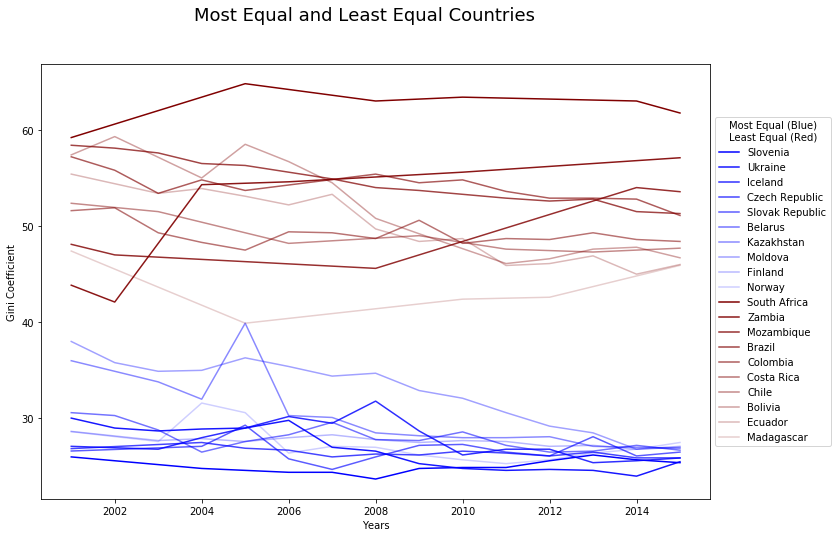

In [23]:
#Graph the Gini Coefficient
#Compare the top ten to bottom ten
plt.figure(figsize=(12,8))

ctr = 1
for country in equal_2015_names:
    equalGini_plot(country, start_year=2001, color='blue', alpha=ctr, label=country)
    ctr = ctr - 0.09

ctr = 1
for country in inequal_2015_names:
    equalGini_plot(country, start_year=2001, color='maroon', alpha=ctr, label=country)
    ctr = ctr - 0.09
    
plt.suptitle('Most Equal and Least Equal Countries', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Most Equal (Blue)\nLeast Equal (Red)')
plt.ylabel('Gini Coefficient')
plt.xlabel('Years')
plt.show()

In [24]:
#Chart Gini Coefficient
#Top Ten
equalGini_time(2001, 2015)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,
Slovenia,26.00,25.60,25.20,24.80,24.60,24.40,24.40,23.70,24.80,24.90,24.90,25.60,26.20,25.70,25.40
Ukraine,30.03,29.00,28.70,28.90,29.00,29.80,27.00,26.60,25.30,24.80,24.60,24.70,24.60,24.00,25.50
Iceland,27.10,26.95,26.80,28.00,29.00,30.20,29.50,31.80,28.70,26.20,26.80,26.80,25.40,25.60,25.89
Czech Republic,26.86,27.07,27.29,27.50,26.90,26.70,26.00,26.30,26.20,26.60,26.40,26.10,26.50,25.90,25.90
Slovak Republic,26.61,26.78,26.94,27.10,29.30,25.80,24.70,26.00,27.20,27.30,26.50,26.10,28.10,26.10,26.50
Belarus,30.60,30.30,28.80,26.50,27.60,28.30,29.60,27.80,27.70,28.60,27.20,26.50,26.60,27.20,26.70
Kazakhstan,36.00,34.90,33.80,32.00,39.90,30.30,30.10,28.50,28.20,28.00,28.00,28.10,27.10,27.00,26.90
Moldova,38.00,35.80,34.90,35.00,36.30,35.40,34.40,34.70,32.90,32.10,30.60,29.20,28.50,26.80,27.00
Finland,28.65,28.17,27.70,27.90,27.60,28.00,28.30,27.80,27.50,27.70,27.60,27.10,27.20,26.80,27.10


In [25]:
#Chart Gini Coefficient
#Bottom Ten
equalGini_time(2001, 2015, inequal=True)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,
South Africa,59.20,60.60,62.00,63.40,64.80,64.20,63.60,63.00,63.20,63.40,63.30,63.20,63.10,63.00,61.75
Zambia,43.85,42.10,48.20,54.30,54.45,54.60,54.85,55.10,55.35,55.60,55.90,56.20,56.50,56.80,57.10
Mozambique,48.10,47.00,46.77,46.53,46.30,46.07,45.83,45.60,47.00,48.40,49.80,51.20,52.60,54.00,53.57
Brazil,58.40,58.10,57.60,56.50,56.30,55.60,54.90,54.00,53.70,53.30,52.90,52.60,52.80,51.50,51.30
Colombia,57.20,55.80,53.40,54.80,53.70,54.27,54.83,55.40,54.50,54.80,53.60,52.90,52.90,52.80,51.10
Costa Rica,51.60,51.90,49.30,48.30,47.50,49.40,49.30,48.70,50.60,48.20,48.70,48.60,49.30,48.60,48.40
Chile,52.37,51.93,51.50,50.40,49.30,48.20,48.47,48.73,49.00,48.30,47.60,47.45,47.30,47.50,47.70
Bolivia,57.40,59.30,57.15,55.00,58.50,56.70,54.50,50.80,49.20,47.65,46.10,46.60,47.60,47.80,46.70
Ecuador,55.40,54.40,53.40,53.90,53.10,52.20,53.30,49.70,48.40,48.70,45.90,46.10,46.90,45.00,46.00


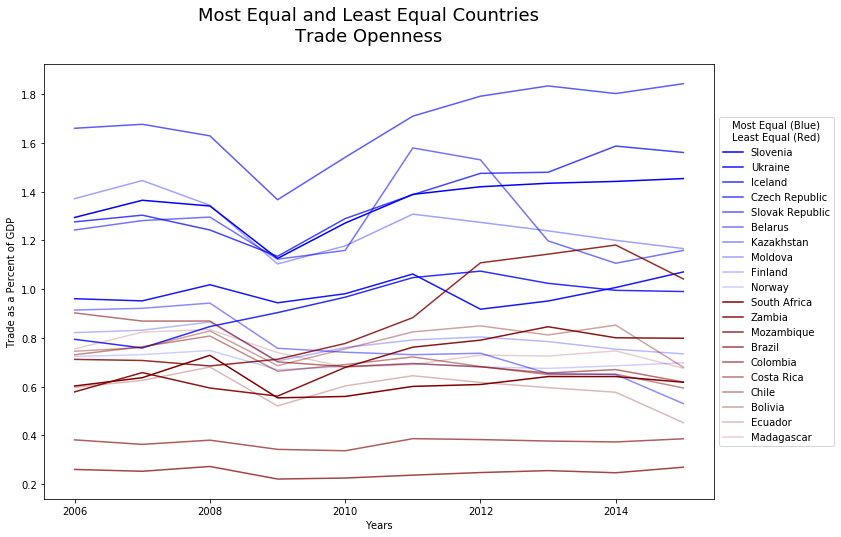

In [26]:
#Graph the Trade
#Compare the top ten to bottom ten
plt.figure(figsize=(12,8))

ctr = 1
for country in equal_2015_names:
    equalGini_plot(country, trade=True, color='blue', alpha=ctr, label=country)
    ctr = ctr - 0.09

ctr = 1
for country in inequal_2015_names:
    equalGini_plot(country, trade=True, color='maroon', alpha=ctr, label=country)
    ctr = ctr - 0.09
    
plt.suptitle('Most Equal and Least Equal Countries\nTrade Openness', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Most Equal (Blue)\nLeast Equal (Red)')
plt.ylabel('Trade as a Percent of GDP')
plt.xlabel('Years')
plt.show()

In [27]:
#Chart Trade
#Top Ten
equalGini_time(2006, 2015, trade=True)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,
Slovenia,1.29,1.36,1.34,1.13,1.27,1.39,1.42,1.43,1.44,1.45
Ukraine,0.96,0.95,1.02,0.94,0.98,1.06,0.92,0.95,1.01,1.07
Iceland,0.79,0.76,0.85,0.90,0.97,1.05,1.07,1.02,1.00,0.99
Czech Republic,1.28,1.30,1.24,1.13,1.29,1.39,1.48,1.48,1.59,1.56
Slovak Republic,1.66,1.68,1.63,1.37,1.54,1.71,1.79,1.83,1.80,1.84
Belarus,1.24,1.28,1.30,1.12,1.16,1.58,1.53,1.20,1.11,1.16
Kazakhstan,0.91,0.92,0.94,0.76,0.74,0.73,0.74,0.65,0.65,0.53
Moldova,1.37,1.45,1.34,1.10,1.18,1.31,1.27,1.24,1.20,1.17
Finland,0.82,0.83,0.87,0.71,0.76,0.79,0.80,0.79,0.75,0.73


In [28]:
#Chart Trade
#Bottom Ten
equalGini_time(2006, 2015, inequal=True, trade=True)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,
South Africa,0.60,0.64,0.73,0.55,0.56,0.60,0.61,0.64,0.64,0.62
Zambia,0.58,0.66,0.59,0.56,0.68,0.76,0.79,0.85,0.80,0.80
Mozambique,0.71,0.71,0.69,0.71,0.78,0.88,1.11,1.14,1.18,1.04
Brazil,0.26,0.25,0.27,0.22,0.23,0.24,0.25,0.26,0.25,0.27
Colombia,0.38,0.36,0.38,0.34,0.34,0.39,0.38,0.38,0.37,0.39
Costa Rica,0.90,0.87,0.87,0.70,0.68,0.69,0.68,0.66,0.67,0.62
Chile,0.73,0.76,0.81,0.66,0.69,0.72,0.68,0.65,0.65,0.59
Bolivia,0.75,0.76,0.83,0.69,0.76,0.82,0.85,0.81,0.85,0.68
Ecuador,0.60,0.63,0.68,0.52,0.60,0.64,0.62,0.60,0.58,0.45


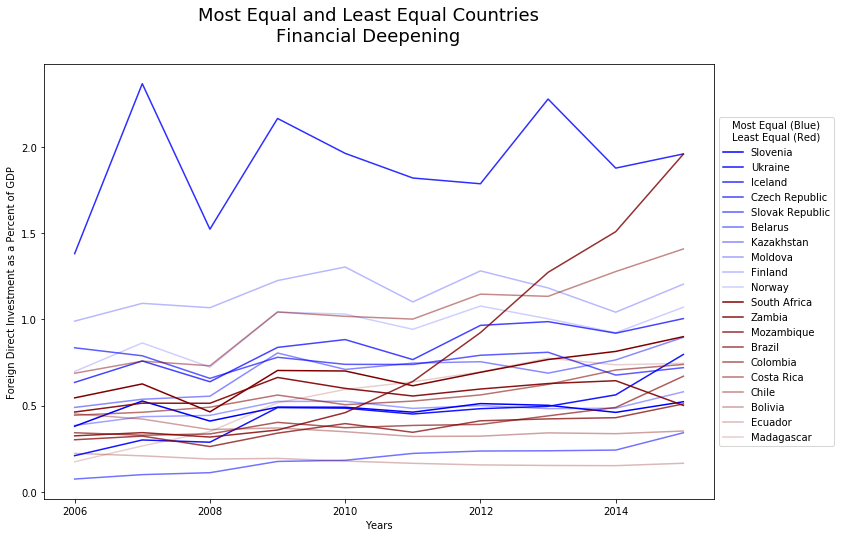

In [29]:
#Graph the FDI
#Compare the top ten to bottom ten
plt.figure(figsize=(12,8))

ctr = 1
for country in equal_2015_names:
    equalGini_plot(country, fdi=True, color='blue', alpha=ctr, label=country)
    ctr = ctr - 0.09

ctr = 1
for country in inequal_2015_names:
    equalGini_plot(country, fdi=True, color='maroon', alpha=ctr, label=country)
    ctr = ctr - 0.09
    
plt.suptitle('Most Equal and Least Equal Countries\nFinancial Deepening', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Most Equal (Blue)\nLeast Equal (Red)')
plt.ylabel('Foreign Direct Investment as a Percent of GDP')
plt.xlabel('Years')
plt.show()

In [30]:
#Chart FDI
#Top Ten
equalGini_time(2006, 2015, fdi=True)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,
Slovenia,0.38,0.53,0.41,0.49,0.49,0.46,0.51,0.50,0.46,0.52
Ukraine,0.21,0.30,0.29,0.49,0.48,0.45,0.48,0.50,0.56,0.80
Iceland,1.38,2.36,1.52,2.16,1.96,1.82,1.78,2.28,1.88,1.96
Czech Republic,0.63,0.76,0.64,0.84,0.88,0.77,0.96,0.99,0.92,1.00
Slovak Republic,0.83,0.79,0.66,0.78,0.74,0.74,0.79,0.81,0.68,0.72
Belarus,0.07,0.10,0.11,0.18,0.18,0.22,0.24,0.24,0.24,0.34
Kazakhstan,0.49,0.54,0.55,0.80,0.71,0.75,0.75,0.69,0.76,0.90
Moldova,0.38,0.44,0.44,0.52,0.53,0.48,0.50,0.48,0.48,0.58
Finland,0.99,1.09,1.07,1.22,1.30,1.10,1.28,1.18,1.04,1.20


In [31]:
#Chart FDI
#Bottom Ten
equalGini_time(2006, 2015, inequal=True, fdi=True)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,
South Africa,0.54,0.63,0.46,0.70,0.70,0.61,0.69,0.77,0.81,0.90
Zambia,0.46,0.51,0.51,0.66,0.60,0.56,0.60,0.63,0.64,0.50
Mozambique,0.32,0.34,0.32,0.36,0.46,0.64,0.92,1.27,1.51,1.96
Brazil,0.30,0.32,0.26,0.34,0.40,0.35,0.41,0.42,0.43,0.51
Colombia,0.34,0.33,0.34,0.40,0.37,0.38,0.39,0.44,0.49,0.67
Costa Rica,0.44,0.46,0.49,0.56,0.51,0.53,0.56,0.62,0.71,0.74
Chile,0.69,0.76,0.73,1.04,1.02,1.00,1.15,1.13,1.28,1.41
Bolivia,0.45,0.42,0.36,0.37,0.35,0.32,0.32,0.34,0.34,0.35
Ecuador,0.22,0.21,0.19,0.19,0.18,0.17,0.16,0.15,0.15,0.17


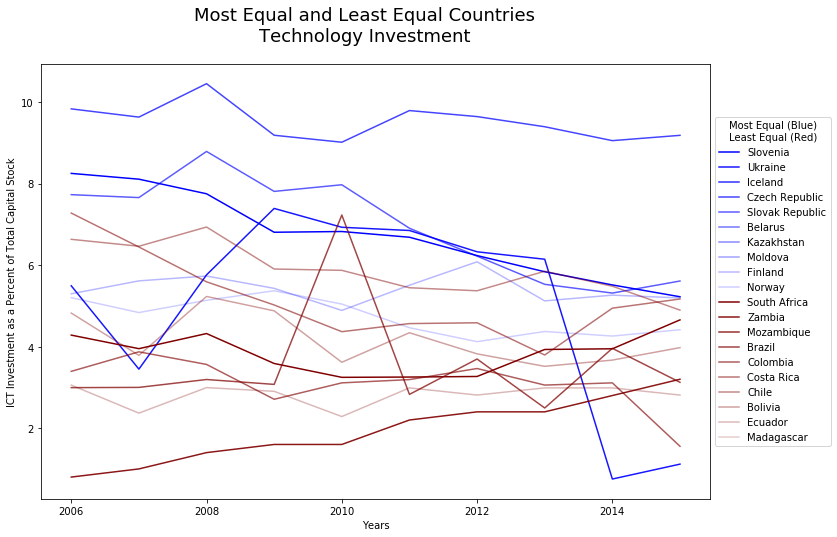

In [32]:
#Graph the Technology
#Compare the top ten to bottom ten
plt.figure(figsize=(12,8))

ctr = 1
for country in equal_2015_names:
    equalGini_plot(country, technology=True, color='blue', alpha=ctr, label=country)
    ctr = ctr - 0.09

ctr = 1
for country in inequal_2015_names:
    equalGini_plot(country, technology=True, color='maroon', alpha=ctr, label=country)
    ctr = ctr - 0.09
    
plt.suptitle('Most Equal and Least Equal Countries\nTechnology Investment', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Most Equal (Blue)\nLeast Equal (Red)')
plt.ylabel('ICT Investment as a Percent of Total Capital Stock')
plt.xlabel('Years')
plt.show()

In [33]:
#Chart Technology
#Top Ten
equalGini_time(2006, 2015, technology=True)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,
Slovenia,8.25,8.11,7.75,6.81,6.82,6.68,6.23,5.84,5.51,5.22
Ukraine,5.49,3.45,5.76,7.39,6.93,6.85,6.33,6.14,0.75,1.12
Iceland,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Czech Republic,9.83,9.63,10.45,9.19,9.01,9.79,9.64,9.39,9.05,9.18
Slovak Republic,7.73,7.66,8.79,7.81,7.97,6.90,6.22,5.53,5.31,5.61
Belarus,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Kazakhstan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Moldova,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Finland,5.30,5.61,5.73,5.43,4.89,5.51,6.08,5.12,5.26,5.19


In [34]:
#Chart Technology
#Bottom Ten
equalGini_time(2006, 2015, inequal=True, technology=True)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,
South Africa,4.28,3.95,4.32,3.59,3.25,3.25,3.27,3.93,3.95,4.66
Zambia,0.80,1.00,1.40,1.60,1.60,2.20,2.40,2.40,2.80,3.20
Mozambique,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Brazil,2.99,3.00,3.19,3.07,7.23,2.83,3.70,2.49,3.96,3.12
Colombia,3.39,3.87,3.56,2.71,3.11,3.19,3.46,3.06,3.11,1.56
Costa Rica,7.28,6.44,5.59,5.02,4.37,4.57,4.59,3.79,4.94,5.17
Chile,6.63,6.46,6.93,5.90,5.87,5.44,5.37,5.85,5.48,4.90
Bolivia,4.82,3.79,5.23,4.88,3.62,4.34,3.82,3.52,3.67,3.98
Ecuador,3.06,2.37,3.00,2.90,2.28,2.99,2.81,2.99,2.99,2.81


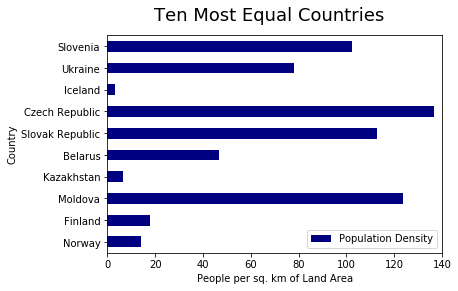

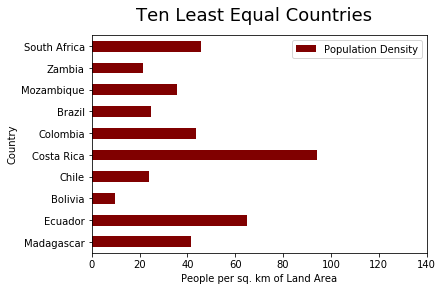

In [35]:
#Compare population density
#Horizontal Bar Chart
plt.figure(figsize=(12,12))
equalGini(2015, popdens=True).plot.barh(stacked=True, color='navy').invert_yaxis()
plt.suptitle("Ten Most Equal Countries", fontsize=18)
plt.ylabel('Country')
plt.xlabel('People per sq. km of Land Area')
plt.xlim([0,140])

equalGini(2015, inequal=True, popdens=True).plot.barh(stacked=True, color='maroon').invert_yaxis()
plt.suptitle('Ten Least Equal Countries', fontsize=18)
plt.ylabel('Country')
plt.xlabel('People per sq. km of Land Area')
plt.xlim([0,140])

plt.show()

In [36]:
#Chart population density
#Most Equal
equalGini(2015, popdens=True)

,Population Density
Country Name,
Slovenia,102.46
Ukraine,77.95
Iceland,3.30
Czech Republic,136.57
Slovak Republic,112.80
Belarus,46.77
Kazakhstan,6.50
Moldova,123.81
Finland,18.03


In [37]:
#Chart population density
#Least Equal
equalGini(2015, inequal=True, popdens=True)

,Population Density
Country Name,
South Africa,45.58
Zambia,21.66
Mozambique,35.62
Brazil,24.64
Colombia,43.47
Costa Rica,94.16
Chile,23.89
Bolivia,9.90
Ecuador,65.00


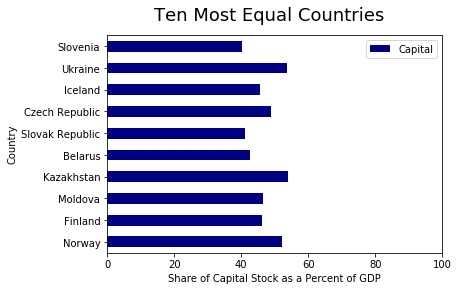

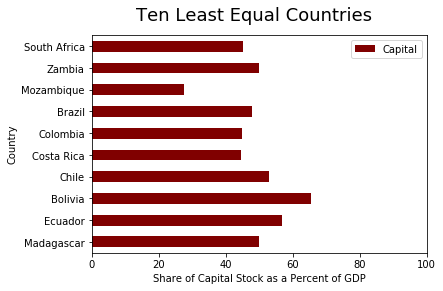

In [38]:
#Compare Share of Capital Stock over GDP
#Horizontal Bar Chart
plt.figure(figsize=(12,12))
equalGini(2015, capital=True).plot.barh(stacked=True, color='navy').invert_yaxis()
plt.suptitle("Ten Most Equal Countries", fontsize=18)
plt.ylabel('Country')
plt.xlabel('Share of Capital Stock as a Percent of GDP')
plt.xlim([0,100])

equalGini(2015, inequal=True, capital=True).plot.barh(stacked=True, color='maroon').invert_yaxis()
plt.suptitle('Ten Least Equal Countries', fontsize=18)
plt.ylabel('Country')
plt.xlabel('Share of Capital Stock as a Percent of GDP')
plt.xlim([0,100])

plt.show()

In [39]:
#Chart Share of Capital Stock over GDP
#Most Equal
equalGini(2015, capital=True)

,Capital
Country Name,
Slovenia,40.20
Ukraine,53.70
Iceland,45.50
Czech Republic,49.00
Slovak Republic,41.00
Belarus,42.70
Kazakhstan,53.90
Moldova,46.60
Finland,46.20


In [40]:
#Chart Share of Capital Stock over GDP
#Least Equal
equalGini(2015, inequal=True, capital=True)

,Capital
Country Name,
South Africa,45.10
Zambia,50.00
Mozambique,27.70
Brazil,48.00
Colombia,45.00
Costa Rica,44.50
Chile,53.10
Bolivia,65.40
Ecuador,56.90


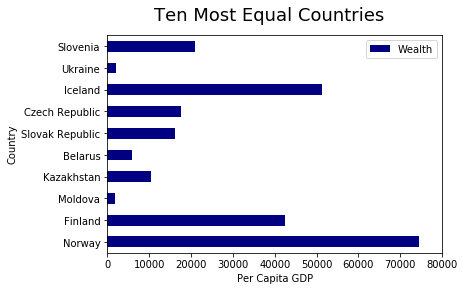

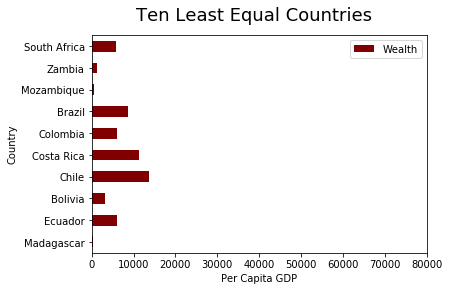

In [41]:
#Compare per capita wealth
#Horizontal Bar Chart
plt.figure(figsize=(12,12))
equalGini(2015, wealth=True).plot.barh(stacked=True, color='navy').invert_yaxis()
plt.suptitle("Ten Most Equal Countries", fontsize=18)
plt.ylabel('Country')
plt.xlabel('Per Capita GDP')
plt.xlim([0,80000])

equalGini(2015, inequal=True, wealth=True).plot.barh(stacked=True, color='maroon').invert_yaxis()
plt.suptitle('Ten Least Equal Countries', fontsize=18)
plt.ylabel('Country')
plt.xlabel('Per Capita GDP')
plt.xlim([0,80000])

plt.show()

In [42]:
#Chart per capita wealth
#Most Equal
equalGini(2015, wealth=True)

,Wealth
Country Name,
Slovenia,20873.16
Ukraine,2124.66
Iceland,51213.66
Czech Republic,17715.62
Slovak Republic,16132.86
Belarus,5949.11
Kazakhstan,10509.98
Moldova,1832.50
Finland,42424.22


In [43]:
#Chart per capita wealth
#Least Equal
equalGini(2015, inequal=True, wealth=True)

,Wealth
Country Name,
South Africa,5744.32
Zambia,1313.89
Mozambique,528.31
Brazil,8757.21
Colombia,6044.53
Costa Rica,11406.36
Chile,13653.23
Bolivia,3077.03
Ecuador,6150.16


In [44]:
#!pip install linearmodels
from linearmodels import PanelOLS
model = PanelOLS(df_rshp[['Gini']], df_rshp[['Trade','FDI','Technology','Population Density','Capital','Wealth']], \
                 time_effects=True)
reg_table = model.fit(cov_type='robust')
reg_table

C:\Users\Siebelm\Anaconda3\lib\site-packages\linearmodels\utility.py:492: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



Dep. Variable:,Gini,R-squared:,0.2452
Estimator:,PanelOLS,R-squared (Between):,0.0200
No. Observations:,1718,R-squared (Within):,-0.1813
Date:,"Mon, Apr 30 2018",R-squared (Overall):,0.0248
Time:,23:39:31,Log-likelihood,-5882.4
Cov. Estimator:,Robust,,
,,F-statistic:,90.762
Entities:,91,P-value,0.0000
Avg Obs:,18.879,Distribution:,"F(6,1676)"
Min Obs:,2.0000,,
Max Obs:,36.000,F-statistic (robust):,142.40
